# EDA for Analyzing Performance
- Understanding the Distribution of Performance-Related Variables
- analyzing the distribution of performance-related features like performancerating, jobsatisfaction, relationshipsatisfaction, and environmentsatisfaction.

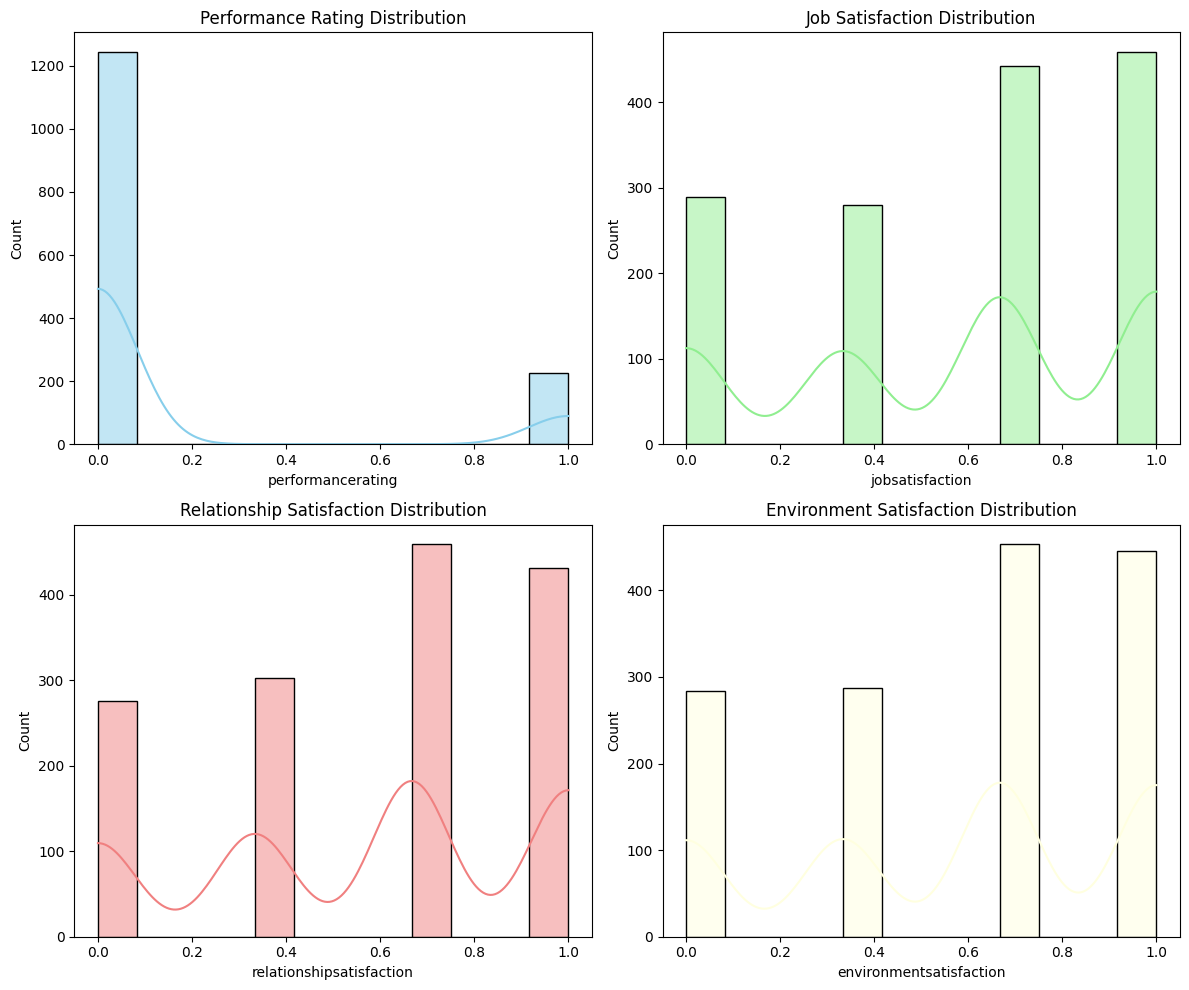

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(prob1['performancerating'], kde=True, ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Performance Rating Distribution')

sns.histplot(prob1['jobsatisfaction'], kde=True, ax=ax[0, 1], color='lightgreen')
ax[0, 1].set_title('Job Satisfaction Distribution')

sns.histplot(prob1['relationshipsatisfaction'], kde=True, ax=ax[1, 0], color='lightcoral')
ax[1, 0].set_title('Relationship Satisfaction Distribution')

sns.histplot(prob1['environmentsatisfaction'], kde=True, ax=ax[1, 1], color='lightyellow')
ax[1, 1].set_title('Environment Satisfaction Distribution')

plt.tight_layout()
plt.show()


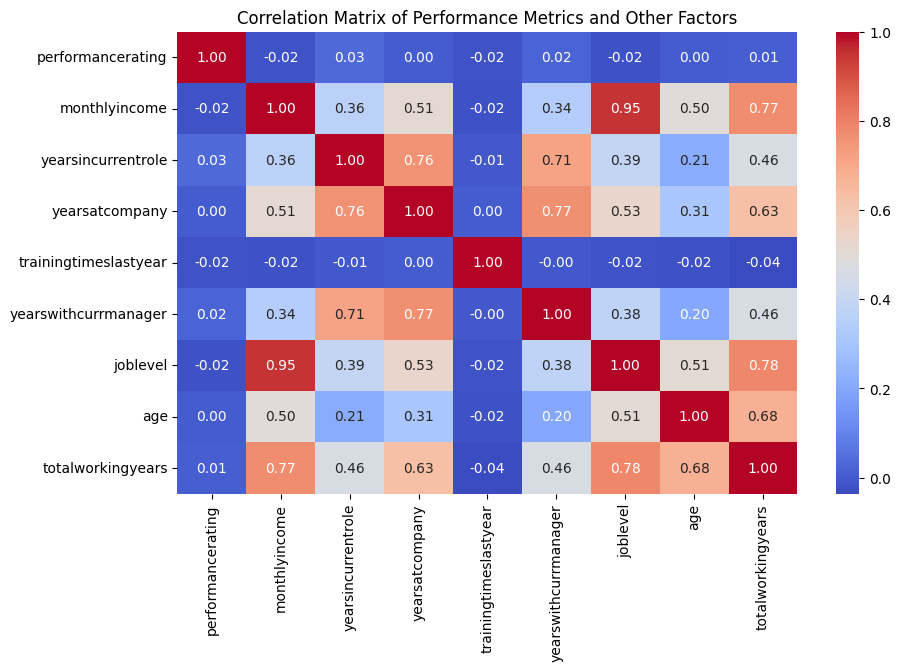

In [139]:
# Compute correlation matrix
correlation_matrix = prob1[['performancerating', 'monthlyincome', 'yearsincurrentrole', 'yearsatcompany',
                            'trainingtimeslastyear', 'yearswithcurrmanager', 'joblevel', 'age', 'totalworkingyears']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Performance Metrics and Other Factors")
plt.show()


- "Years with current manager" refers to the number of years an employee has been working under the supervision or management of their current manager. This metric helps assess the duration of the working relationship between the employee and their manager, which can influence various factors such as:

- Employee performance: A longer tenure with the same manager might lead to better communication, understanding of job expectations, and performance.
- Employee satisfaction: A good working relationship with a manager can lead to higher job satisfaction and lower attrition rates.
- Career growth: Employees with longer tenures with their manager might receive more tailored feedback and guidance, potentially resulting in higher career progression.

In [140]:
# Print the number of unique values in the 'performancerating' column
unique_performance_ratings = prob1['performancerating'].nunique()
print(f"Number of unique performance ratings: {unique_performance_ratings}")


Number of unique performance ratings: 2


In [147]:
high_performers = prob1[prob1['performancerating'] >= 1]
low_performers = prob1[prob1['performancerating'] < 0.1]
high_low_comparison = pd.DataFrame({
    'High Performers': high_performers[['monthlyincome', 'yearsincurrentrole', 'trainingtimeslastyear', 'yearswithcurrmanager','distancefromhome','numcompaniesworked','education','jobinvolvement','environmentsatisfaction']].mean(),
    'Low Performers': low_performers[['monthlyincome', 'yearsincurrentrole', 'trainingtimeslastyear', 'yearswithcurrmanager','distancefromhome','numcompaniesworked','education','jobinvolvement','environmentsatisfaction']].mean()
})
print(high_low_comparison)


                         High Performers  Low Performers
monthlyincome                   0.279352        0.291115
yearsincurrentrole              0.251475        0.231958
trainingtimeslastyear           0.458702        0.467980
yearswithcurrmanager            0.253774        0.240496
distancefromhome                0.310999        0.289246
numcompaniesworked              0.290069        0.300911
education                       0.463496        0.480908
jobinvolvement                  0.560472        0.579582
environmentsatisfaction         0.548673        0.578510


- The data comparison between high and low performers  
- The key thing to note is both high and low performers are strongly affected by job involvent (the effort they put in - 0.57), enviornment satisfaction (0.57) and education qualification.
- Also , supported by previous EDA, we can see training times - team bonding + skill sessions seem to differentiate out the performers and also affect their attrition rates. 


In [149]:
# Label encoding for binary categorical columns
binary_columns = ['overtime', 'gender','attrition']
for col in binary_columns:
    combined_df[col] = combined_df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})



In [150]:
from sklearn.preprocessing import LabelEncoder

# Multi-category columns
multi_columns = ['educationfield', 'maritalstatus', 'department', 'jobrole', 'businesstravel']
le = LabelEncoder()

# Apply label encoding to each column and display the mapping
for col in multi_columns:
    combined_df[col] = le.fit_transform(combined_df[col])
    print(f"Label encoding for '{col}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print()  # Print an empty line for better readability




Label encoding for 'educationfield':
{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}

Label encoding for 'maritalstatus':
{'Divorced': 0, 'Married': 1, 'Single': 2}

Label encoding for 'department':
{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

Label encoding for 'jobrole':
{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}

Label encoding for 'businesstravel':
{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}



In [151]:
print(combined_df.head())

   monthlyincome  educationfield  attrition  distancefromhome  dailyrate  \
0           5993               1          1                 1       1102   
1           5130               1          0                 8        279   
2           2090               4          1                 2       1373   
3           2909               1          0                 3       1392   
4           3468               3          0                 2        591   

   joblevel  numcompaniesworked  monthlyrate  stockoptionlevel  education  \
0         2                   8        19479                 0          2   
1         2                   1        24907                 1          1   
2         1                   6         2396                 0          2   
3         1                   1        23159                 0          4   
4         1                   9        16632                 1          1   

   ...  businesstravel  gender  age  employeecount  relationshipsatisfaction  \


# Label Dictionary
- Label encoding for 'educationfield':
{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}

- Label encoding for 'maritalstatus':
{'Divorced': 0, 'Married': 1, 'Single': 2}

- Label encoding for 'department':
{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

- Label encoding for 'jobrole':
{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}

- Label encoding for 'businesstravel':
{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
- Yes:1 No:0
- Male :1 Female: 0

In [152]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   monthlyincome             1470 non-null   int64
 1   educationfield            1470 non-null   int64
 2   attrition                 1470 non-null   int64
 3   distancefromhome          1470 non-null   int64
 4   dailyrate                 1470 non-null   int64
 5   joblevel                  1470 non-null   int64
 6   numcompaniesworked        1470 non-null   int64
 7   monthlyrate               1470 non-null   int64
 8   stockoptionlevel          1470 non-null   int64
 9   education                 1470 non-null   int64
 10  percentsalaryhike         1470 non-null   int64
 11  maritalstatus             1470 non-null   int64
 12  worklifebalance           1470 non-null   int64
 13  yearsincurrentrole        1470 non-null   int64
 14  performancerating         1470 non-null   int

- Employee Attrition Prediction aims to identify which employees are likely to leave the organization (attrition) based on various features such as job role, salary, work environment, etc.
- Predicting attrition helps HR departments take preventive actions to retain valuable employees and reduce turnover costs.

In [154]:
prob2_df = combined_df.copy()

In [155]:
# Calculate the correlation matrix
correlation_matrix = prob2_df.corr()
# Extract the correlation with the 'performancerating' column
correlation_with_p = correlation_matrix['performancerating']
print(correlation_with_p)





monthlyincome              -0.017120
educationfield             -0.005614
attrition                   0.002889
distancefromhome            0.027110
dailyrate                   0.000473
joblevel                   -0.021222
numcompaniesworked         -0.014095
monthlyrate                -0.009811
stockoptionlevel            0.003506
education                  -0.024539
percentsalaryhike           0.773550
maritalstatus               0.005207
worklifebalance             0.002572
yearsincurrentrole          0.034986
performancerating           1.000000
department                 -0.024604
yearssincelastpromotion     0.017896
employeenumber             -0.020359
trainingtimeslastyear      -0.015579
totalworkingyears           0.006744
jobrole                    -0.024233
overtime                    0.004369
hourlyrate                 -0.002172
yearsatcompany              0.003435
businesstravel             -0.026341
gender                     -0.013859
age                         0.001904
e

In [158]:
# Sort the correlations with performance rating
sorted_corr = correlation_with_p.sort_values(ascending=False)

# Get the top 10 highest positive and negative correlations
top_10_corr = pd.concat([sorted_corr.head(10), sorted_corr.tail(10)])

print(top_10_corr)


performancerating           1.000000
percentsalaryhike           0.773550
yearsincurrentrole          0.034986
distancefromhome            0.027110
yearswithcurrmanager        0.022827
yearssincelastpromotion     0.017896
totalworkingyears           0.006744
maritalstatus               0.005207
overtime                    0.004369
stockoptionlevel            0.003506
joblevel                   -0.021222
jobrole                    -0.024233
education                  -0.024539
department                 -0.024604
businesstravel             -0.026341
jobinvolvement             -0.029071
environmentsatisfaction    -0.029548
relationshipsatisfaction   -0.031351
employeecount                    NaN
standardhours                    NaN
Name: performancerating, dtype: float64


#### Strong Positive Correlations:
- Percent Salary Hike (0.77):employees who receive higher salary hikes tend to have higher performance ratings.
#### Weak Positive Correlations:
Years in Current Role (0.034) and satisfaction with current manager show weak positive correlations with performance rating. this means while these factors may have a slight influence on performance, they are not major drivers of performance 
#### Negative Correlations:
Job Level (-0.021222), Job Role (-0.024233), Education (-0.024539), and Department 

In [159]:
df_encoded= prob2_df.copy()

In [163]:
# Columns for correlation analysis
columns_of_interest = ['monthlyincome', 'yearsincurrentrole', 'trainingtimeslastyear',
                       'yearswithcurrmanager', 'distancefromhome', 'numcompaniesworked',
                       'education', 'jobinvolvement', 'environmentsatisfaction', 'attrition', 'performancerating']

# Select only the relevant columns
df_selected = df_encoded[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Print the correlation matrix
print(correlation_matrix['performancerating'])


monthlyincome             -0.017120
yearsincurrentrole         0.034986
trainingtimeslastyear     -0.015579
yearswithcurrmanager       0.022827
distancefromhome           0.027110
numcompaniesworked        -0.014095
education                 -0.024539
jobinvolvement            -0.029071
environmentsatisfaction   -0.029548
attrition                  0.002889
performancerating          1.000000
Name: performancerating, dtype: float64


In [164]:
# Calculate the correlation matrix
correlation_matrix = prob2_df.corr()

# Extract the correlation with the 'attrition' column
correlation_with_attrition = correlation_matrix['attrition']

# Display the correlation with 'attrition'
print(correlation_with_attrition)

monthlyincome              -0.159840
educationfield              0.026846
attrition                   1.000000
distancefromhome            0.077924
dailyrate                  -0.056652
joblevel                   -0.169105
numcompaniesworked          0.043494
monthlyrate                 0.015170
stockoptionlevel           -0.137145
education                  -0.031373
percentsalaryhike          -0.013478
maritalstatus               0.162070
worklifebalance            -0.063939
yearsincurrentrole         -0.160545
performancerating           0.002889
department                  0.063991
yearssincelastpromotion    -0.033019
employeenumber             -0.010577
trainingtimeslastyear      -0.059478
totalworkingyears          -0.171063
jobrole                     0.067151
overtime                    0.246118
hourlyrate                 -0.006846
yearsatcompany             -0.134392
businesstravel              0.000074
gender                      0.029453
age                        -0.159205
e

Using the top 5 most correlated features and domain-relevant factors to create the 2 models 